# Tema 7

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

**Problema 7.1**

La localización de un cambio de carga en un lazo de control puede afectar a la respuesta del sistema. En el diagrama de bloques adjunto se produce un cambio en escalón unidad en la posición 1 ó 2.

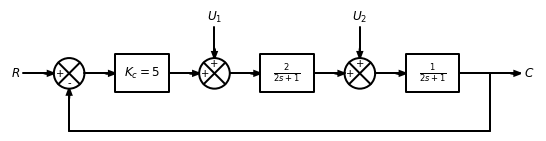

In [1]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

hbox = 1.25
wbox = 1.75

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("$R$", "left")
d += (sum1 := dsp.Mixer(W="+", S="-"))
d += dsp.Arrow().at(sum1.E)
d += (cont := dsp.Box(h=hbox, w=wbox).label("$K_c=5$", "center").anchor("W"))
d += dsp.Arrow().at(cont.E).right()
d += (sum2 := dsp.Mixer(W="+", N="+"))
d.push() 
d += dsp.Arrow().label("$U_1$", "right").up().at(sum2.N).reverse()
d.pop()
d += dsp.Arrow().at(sum2.E).right()
d += (proc1 := dsp.Box(h=hbox, w=wbox).label(r'$\frac{2}{2s+1}$', "center").anchor("W"))
d += dsp.Arrow().at(proc1.E).right()
d += (sum3 := dsp.Mixer(W="+", N="+"))
d.push() 
d += dsp.Arrow().label("$U_2$", "right").up().at(sum3.N).reverse()
d.pop()
d += dsp.Arrow().at(sum3.E).right()
d += (proc2 := dsp.Box(h=hbox, w=wbox).label(r'$\frac{1}{2s+1}$', "center").anchor("W"))
d += dsp.Line().at(proc2.E).right()
d += (dot := dsp.Dot(radius=0))
d.push()
d += dsp.Arrow().at(dot.center).right().label("$C$", "right")
d.pop()
d += dsp.Line().down().at(dot.center).length(hbox*1.5)
d += dsp.Line().left().tox(sum1.S)
d += dsp.Arrow().up().to(sum1.S)

d.save("./img/prob701.svg")
d.draw()

1. ¿Cuál es la frecuencia del estado transitorio si la variación se produce en la posición 1? ¿Y si es en la 2?

2. ¿Cuánto valdrá el _offset_ en cada caso? Suponer un escalón unidad.

**Problema 7.2**

Para controlar un sistema de primer orden se utiliza un controlador PD con un elemento de medida cuya dinámica también es de primer orden.

1. Determinar las expresiones de la constante de tiempo y el coeficiente de amortiguamiento para el sis- tema de lazo cerrado

2. Si τp = 1 min y τm = 10s, calcular Kc para que el coeficiente de amortiguamiento sea 0.7 en los siguientes supuestos: (1) τd = 0 y (2) τd = 3 s.

3. Comparar, para las dos situaciones del apartado b) el offset y el periodo, y comentar la ventaja que representa la adición de la acción derivativa

**Problema 7.3**

Sea el sistema de lazo de control de la figura adjunta:

![prob703](./img/prob703.svg)

1. Dibujar el diagrama de bloques indicando la función de transferencia de cada subsitema. Suponer que el detector de nivel actua sin retraso alguno sobre el controlador

2. ¿Cuál es la función de transferencia para variaciones de carga ($H/Q_1$)?

3. Discutir la influencia de los parámetros de proceso y de los del controlador sobre la dinámica del sistema.

**Problema 7.4**

Sea el sencillo lazo de control de la figura:

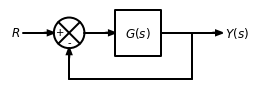

In [2]:
hbox = 1.5
wbox = 1.5

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("$R$", "left")
d += (sum1 := dsp.Mixer(W="+", S="-"))
d += dsp.Arrow().at(sum1.E)
d += (cont := dsp.Box(h=hbox, w=wbox).label("$G(s)$", "center").anchor("W"))
d += dsp.Line().at(cont.E).right()
d += dsp.Dot(radius=0)
d.push()
d += dsp.Arrow().right().label("$Y(s)$", "right")
d.pop()
d += dsp.Line().down().length(hbox)
d += dsp.Line().left().tox(sum1.S)
d += dsp.Arrow().up().to(sum1.S)

d.save("./img/prob704.svg")
d.draw()

donde $G_p = \frac{k}{s(s+p)}$.

Determinar la ganancia k y el parámetro p para que la dinámica del sistema responda a las siguientes características:

1. Para un cambio en escalón el overshoot debe ser inferior al 5%.

2. El periodo de oscilación de 4 s.

**Problema 7.5**

Los marcapasos electrónicos actúan sobre el corazón de manera que este responda adecuadamente al ritmo cardiaco deseado. La situación dinámica se puede representar por el bucle de control retroalimentado de la figura adjunta:

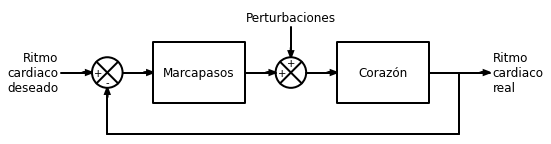

In [3]:
hbox = 1
wbox = 1.5

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("Ritmo\ncardiaco\ndeseado", "left")
d += (sum1 := dsp.Mixer(W="+", S="-").anchor("W"))
d += dsp.Arrow().right()
d += (marcap := dsp.Box().label("Marcapasos", "center").anchor("W"))
d += dsp.Arrow().at(marcap.E).right()
d += (sum2 := dsp.Mixer(W="+", N="+").anchor("W"))
d.push()
d += dsp.Arrow().up().label("Perturbaciones", "right").at(sum2.N).reverse()
d.pop()
d += dsp.Arrow().right().at(sum2.E)
d += (corazon := dsp.Box().label(r"Corazón", "center").anchor("W"))
d += dsp.Line().at(corazon.E).right()
d += (dot := dsp.Dot(radius=0))
d.push()
d += dsp.Arrow().right().at(dot.center).label("Ritmo\ncardiaco\nreal", "right")
d.pop()
d += dsp.Line().down().length(hbox*2)
d += dsp.Line().left().tox(sum1.S)
d += dsp.Arrow().up().to(sum1.S)

d.save("./img/prob705.svg")
d.draw()

Se ha establecido que la función de transferencia del marcapasos es $\frac{K}{0.1 s+1}$ y la del colarzon es $\frac{1}{s}$. El ritmo cardiaco normal es de 70 pulsaciones/min.

Determinar:

1. Si $K = 10$, ¿cuánto vale la constante de tiempo de todo el sistema? ¿Qué sentido físico tiene dicha constante?

2. Si se produjera una perturbación sostenida de 10 pulsaciones en exceso, ¿qué ritmo cardiaco estacionario se alcanzaría?

3. Suponer que el individuo puede tolerar durante períodos de tiempo no excesivos un ritmo cardiaco de 110 pulsaciones/min, siempre que en ningún caso se llegue a 130, aunque sea puntualmente. ¿Qué valor ha de tener $K$ para que un paso súbito de 70 a 110 pulsaciones/min en la consigna sea tolerable para el individuo?

**Problema 7.6**

Uno de los problemas más importantes con el que se enfrentan los ingenieros es el empleo óptmio de las fuentes de energía. Muchos ingenieros trabajan hoy en día en sistemas de energía solar para calefacción doméstica. Uno de esos sistemas emplea colectores solares y almacenamiento térmico, tal como se indica en el diagrama superior de la figura adjunta. El diagrama de bloques del sistema de control se presenta en la parte inferior de la figura:

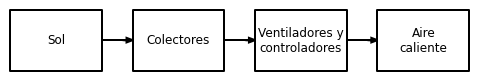

In [4]:
hbox = 1
wbox = 1.1

d = schemdraw.Drawing(unit=1, fontsize=12)

d += (sol := dsp.Box().label("Sol", "center"))
d += dsp.Arrow().right().at(sol.E)
d += (colec := dsp.Box().label("Colectores", "center").anchor("W"))
d += dsp.Arrow().right().at(colec.E)
d += (ventil := dsp.Box().label("Ventiladores y\ncontroladores", "center").anchor("W"))
d += dsp.Arrow().right().at(ventil.E)
d += (aire := dsp.Box().label("Aire\ncaliente", "center").anchor("W"))

d.save("./img/prob706a.svg")
d.draw()

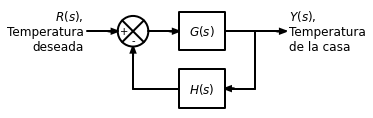

In [5]:
hbox = 1.25
wbox = 1.5

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("$R(s),$\nTemperatura\ndeseada", "left")
d += (sum := dsp.Mixer(W="+", S="-").anchor("W"))
d += dsp.Arrow().at(sum.E).right()
d += (proc := dsp.Box(h=hbox, w=wbox).label("$G(s)$", "center").anchor("W"))
d += dsp.Line().at(proc.E).right()
d += dsp.Dot(radius=0)
d.push()
d += dsp.Arrow().right().label("$Y(s)$,\nTemperatura\nde la casa", "right")
d.pop()
d += dsp.Line().down().length(hbox*1.5)
d += dsp.Arrow().left()
d += (medidor := dsp.Box(h=hbox, w=wbox).label("$H(s)$", "center").anchor("E"))
d += dsp.Line().at(medidor.W).left().tox(sum.S)
d += dsp.Arrow().up().to(sum.S)

d.save("./img/prob706b.svg")
d.draw()

La dinámica de los colectores, el almacenamiento térmico y la propia casa viene dada por $G(s) = \frac{k_1}{s^2}$. La dinámica de los instrumentos de medida viene determinada por $H(s) = \frac{k_2}{\tau_1s + 1}$ . Suponer que $\tau_1 = 1 \mathrm{ s}$ y $\tau_2 = 0$ (aproximación).
 
1. ¿Para qué valores de $k = k_1 k_2$ el sistema será subamortiguado y para cuáles sobreamortiguado?

2. ¿Para qué valores de $k$ la temperatura de la casa, al variar la consigna, no discrepará en ningún momento más de un 5 % del nuevo valor estacionario a alcanzar?

3. Suponer que la temperatura de la casa está estabilizada en 22 ℃. Si la consigna se cambia de pronto a 24 ℃, siendo $k_2 = 1.1$, ¿qué temperatura se alcanzará en la casa?

**Problema 7.7**

Sea el sistema cuyo diagrama de bloques se presenta en la figura adjunta:

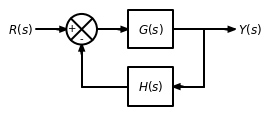

In [6]:
hbox = 1.25
wbox = 1.5

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("$R(s)$", "left")
d += (sum := dsp.Mixer(W="+", S="-").anchor("W"))
d += dsp.Arrow().at(sum.E).right()
d += (proc := dsp.Box(h=hbox, w=wbox).label("$G(s)$", "center").anchor("W"))
d += dsp.Line().at(proc.E).right()
d += dsp.Dot(radius=0)
d.push()
d += dsp.Arrow().right().label("$Y(s)$", "right")
d.pop()
d += dsp.Line().down().length(hbox*1.5)
d += dsp.Arrow().left()
d += (medidor := dsp.Box(h=hbox, w=wbox).label("$H(s)$", "center").anchor("E"))
d += dsp.Line().at(medidor.W).left().tox(sum.S)
d += dsp.Arrow().up().to(sum.S)

d.save("./img/prob707.svg")
d.draw()

donde $G(s) = \frac{K}{s(s+1)}$ y $H(s)=1+K_ms$.

Determinar los valores de ganancia $K$ y de la constante $K_m$ para que la respuesta a un escalón unidad tenga un _overshoot_ de 0.2 al cabo de 1 s.

**Problema 7.8**

En muchas ciudades se han realizado esfuerzos significativos para reciclar los envases de vidrio. En la figura siguiente se representa un diagrama de bloques simplificado del proceso de reciclado de una ciudad:

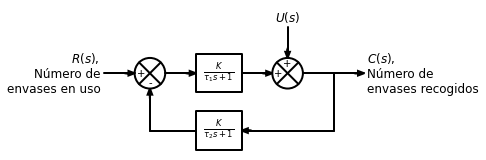

In [7]:
hbox = 1.25
wbox = 1.5

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("$R(s)$, \nNúmero de\nenvases en uso", "left")
d += (sum := dsp.Mixer(W="+", S="-").anchor("W"))
d += dsp.Arrow().at(sum.E).right()
d += (proc := dsp.Box(h=hbox, w=wbox).label(r"$\frac{K}{\tau_1s+1}$", "center").anchor("W"))
d += dsp.Arrow().at(proc.E).right()
d += (sum1 := dsp.Mixer(W="+", N="+").anchor("W"))
d.push()
d += dsp.Arrow().up().label("$U(s)$", "right").at(sum1.N).reverse()
d.pop()
d += dsp.Line().right().at(sum1.E)
d += dsp.Dot(radius=0)
d.push()
d += dsp.Arrow().right().label("$C(s)$, \nNúmero de\nenvases recogidos", "right")
d.pop()
d += dsp.Line().down().length(hbox*1.5)
d += dsp.Arrow().left().length(3)
d += (medidor := dsp.Box(h=hbox, w=wbox).label(r"$\frac{K}{\tau_2 s+1}$", "center").anchor("E"))
d += dsp.Line().at(medidor.W).left().tox(sum.S)
d += dsp.Arrow().up().to(sum.S)

d.save("./img/prob708.svg")
d.draw()

El énfasis de la campaña de recolección viene dado por la ganancia $K$. La perturbación $U$ representa los envases que se rompen o se tiran a la basura o a otro lugar no controlado. Suponter $\tau_1 = 1\mathrm{ mes}$ y $\tau_2 = 0.5\mathrm{ mes}$. Determinar:

1. La ganancia $K$ para que es sistema esté crítcamente amortiguado.

2. El _offset_ para una entrada en escalón unidad en la consigna, suponiendo $U(s)=0$. ¿Cuán sería ese _oofset_ para la ganacia del apartado a)?

3. El _offset_ para una pérdida de envases $M$ en escalón, suponiendo que no varía la consigna. ¿Este _offset_ será positivo o negativo?

**Problema 7.9**

El comportamiento dinámico de una compleja organización empresarial se puede considerar un sistema de control por retroalimentación. Un modelo sencillo de un sistema de gestión se presneta en la figura adjunta.  La función de transferencia correspondiente a la actividad de gestión de la empresa es $G_c(s) = \frac{k_1}{s}$. La función de transferencia correspondiente a las actividades de ingeniería y producción es $G_p(s) = \frac{k_2}{\tau_p s+1}$. La función de transferencia de la actividad de evaluación de los resultados, $C(s)$, de la empresa es $H(s) = k_4 + k_5 s$. El resultado de la evaluación, $B(s)$, se compara con los objetivos propuestos, $R(s)$, y la diferneica constituye la entrada al bloque de gestión, $G_c$, que dará lugar a la pertinente acción correctora. $D(s)$ representa las perturbaciones que actuan sobre el sistema.

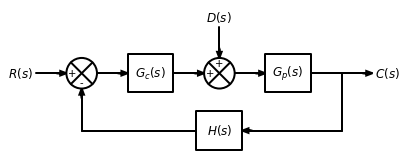

In [8]:
hbox = 1.25
wbox = 1.5

d = schemdraw.Drawing(unit=1, fontsize=12)

d += dsp.Arrow().label("$R(s)$", "left")
d += (sum := dsp.Mixer(W="+", S="-").anchor("W"))
d += dsp.Arrow().at(sum.E).right()
d += (control := dsp.Box(h=hbox, w=wbox).label("$G_c(s)$", "center").anchor("W"))
d += dsp.Arrow().at(control.E).right()
d += (sum1 := dsp.Mixer(W="+", N="+").anchor("W"))
d.push()
d += dsp.Arrow().up().label("$D(s)$", "right").at(sum1.N).reverse()
d.pop()
d += dsp.Arrow().right().at(sum1.E)
d += (proc := dsp.Box(w=wbox, h=hbox).label("$G_p(s)$", "center").anchor("W"))
d += dsp.Line().right().at(proc.E)
d += dsp.Dot(radius=0)
d.push()
d += dsp.Arrow().right().label("$C(s)$", "right")
d.pop()
d += dsp.Line().down().length(hbox*1.5)
d += dsp.Arrow().left().length(3.25)
d += (medidor := dsp.Box(h=hbox, w=wbox).label("$H(s)$", "center").anchor("E"))
d += dsp.Line().at(medidor.W).left().tox(sum.S)
d += dsp.Arrow().up().to(sum.S)

d.save("./img/prob709.svg")
d.draw()

1. ¿Cuál es la función (en el espacio $s$) que relaciona la salida $C(s)$ con la consigna $R(s)$ y la carga $D(s)$?

2. Calcular el _offset_ si se produce en la consigna una variación de una unidad en forma de escalón.

3. Calcular el _overshoot_ de la respuesta en tiempo real a la variación anterior.

4. ¿Qué sencilla modificación realizaría para mejorar la dinámica de este sistema de control?

Datos:

- $k_1 k_2 = 0.1$
- $\tau_p = 10\mathrm{ meses}$
- $k_4 = 5$
- $k_5 = 7.6$

**Problema 7.10**

Considerar una lazo cerrado con las funciones de transferencia siguientes:

$$\begin{aligned}
    G_c &= 5 \\
    G_f &= 1 \\
    G_p &= \frac{2}{(s+1)(3s+1)} \\
    G_d &= \frac{1}{(s+1)(3s+1)} \\
    G_m &= 1
\end{aligned}$$

Para un cambio en el _set point_ de magnitud 2, contestar a las siguientes preguntas:

1. Derivar una expresión en el dominio de Laplace para la respuesta de lazo cerrado.

2. Obtener la respuesta del lazo cerrado en tiempo real.

3. Calcular el valor máximo de $y(t)$ y establecer cuando ocurre.

4. Calcular el _offset_.

5. Calcular el periodo de oscilación de la respuesta de lazo cerrado.

6. Dibujar cualitativamente la respuesta en tiempo real.


**Problema 7.11**

Repetir el problema anterior para un cambio en las perturbaciones de magnitud 1.5.


**Problema 7.12**
 

Sea un lazo de control por retroalimentación de un proceso de primer orden de ganancia 5 y constante de tiempo 2. Se selecciona un controlador proporcional de ganancia unidad. La función de transferencia del medidor es de primer orden con ganancia $K_m$ y constante de tiempo $\tau_m$. Asumiendo que la función de transferencia del elemento final de control es igual a la unidad:

1.  Examinar el efecto de $K_m$ sobre la respuesta de lazo cerrado (p.ej., para $\tau_m = 1$ evaluar la constante de tiempo y coeficiente de amortiguamiento de la respuesta de lazo cerrado para varios valores de $K_m$).

2.  Evaluar el efecto de $\tau_m$ sobre la respuesta de lazo cerrado.

3.  Dibujar cualitativamente las respuestas de lazo cerrado en función de varios valores de $K_m$ y $\tau_m$. Discutir el efecto del medidor en la respuesta de lazo cerrado en función de estas gráficas (p.ej., discutir el efecto sobre el *overshoot*, la razón de disminución y el periodo de oscilación).

**Problema 7.13**

Considerar un sencillo sistema de control de nivel de un tanque de almacenamiento. Se puede tomar como variable manipulable tanto el caudal de la entrada $F_i$ como el caudal de salida $F_o$. Inicialmente el sistema se encuentra en estado estacionario con $F_i = F_o = 3 \text{ m}^3 / \mathrm{min}$ y un nivel de líquido de 60 cm. El área de la sección del depósito es de $2 \text{ m}^2$. Responder:

1.  Encontrar la respuesta de lazo cerrado a un incremento en escalón unidad en el punto de consigna cuando se utiliza $F_i$ como variable manipulable.

2.  Repetir a) pero utilizando $F_o$ como variable manipulable.

3.  Dibujar las dos respuestas y explicar las diferencias, si las hay, entre tomar $F_i$ y $F_o$ como variables manipulables.

Tomar un controlador proporcional de ganancia 10 y que las funciones de transferencia de la válvula y del medidor son iguales a la unidad.

**Problema 7.14**
 

Repetir el problema anterior con las siguientes modificaciones:

1.  La función de transferencia de la válvula de entrada es $G_{f, i} (s) = 1$ y la de la válvula de salida es $G_{f, 0} (s) = \frac{10}{3 s + 1}$.

2.  La ganancia proporcional es igual a 10.